In [181]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [182]:
dataset = pd.read_csv("HR-Employee-Attrition.csv")

In [183]:
dataset.shape

(1470, 35)

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [185]:
dataset["Attrition_code"] = dataset["Attrition"].astype("category").cat.codes

In [186]:
dataset["BusinessTravel_code"] = dataset["BusinessTravel"].astype("category").cat.codes

In [187]:
dataset["gender_code"] = dataset["Gender"].astype("category").cat.codes

In [188]:
dataset["MaritalStatus_code"] = dataset["MaritalStatus"].astype("category").cat.codes

In [189]:
dataset["OverTime_code"] = dataset["OverTime"].astype("category").cat.codes

In [190]:
dataset["JobRole_code"] = dataset["JobRole"].astype("category").cat.codes

In [191]:
dataset["EducationField_code"] = dataset["EducationField"].astype("category").cat.codes

In [192]:
dataset["Department_code"] = dataset["Department"].astype("category").cat.codes

In [193]:
dataset["Attrition_pred_code"] = (dataset["Attrition"] == "Yes").astype("int")

In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [195]:
cleaned_dataset = dataset.drop(["OverTime","Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"], axis = 1)

In [196]:
cleaned_dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition_code,BusinessTravel_code,gender_code,MaritalStatus_code,OverTime_code,JobRole_code,EducationField_code,Department_code,Attrition_pred_code
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,0,2,1,7,1,2,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,0,6,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,2,1,2,4,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,0,1,1,6,1,1,0
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,1,0,2,3,1,0


In [197]:
cleaned_dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition_code,BusinessTravel_code,gender_code,MaritalStatus_code,OverTime_code,JobRole_code,EducationField_code,Department_code,Attrition_pred_code
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,4.123129,0.161224,1.607483,0.600000,1.097279,0.282993,4.458503,2.247619,1.260544,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,3.568136,0.367863,0.665455,0.490065,0.730121,0.450606,2.461821,1.331369,0.527792,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,0.000000,2.000000,1.000000,1.000000,0.000000,5.000000,2.000000,1.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,7.000000,0.000000,2.000000,1.000000,2.000000,1.000000,7.000000,3.000000,2.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,17.000000,1.000000,2.000000,1.000000,2.000000,1.000000,8.000000,5.000000,2.000000,1.000000


In [198]:
x = cleaned_dataset.drop(columns = ["Attrition_pred_code", "Attrition_code"])
y = cleaned_dataset["Attrition_pred_code"]

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [199]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 5, 7]}

In [200]:
rfc = RandomForestClassifier(random_state=42)

In [202]:
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1)

In [203]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [204]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 50}


In [206]:
rfc_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                  max_depth=grid_search.best_params_['max_depth'],
                                  random_state=42)

In [215]:
model = rfc_best.fit(x_train, y_train)

In [216]:
model

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [210]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

In [211]:
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))
print('AUC-ROC: {:.2f}'.format(auc_roc))

Accuracy: 0.87
Precision: 0.57
Recall: 0.10
F1-score: 0.17
AUC-ROC: 0.55


In [217]:
y_pred = model.predict(x_test)

In [218]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [220]:
importances = model.feature_importances_

In [163]:
for feature, importance in zip(x.columns, importances):
    print(f'{feature}: {importance}')

Age: 0.05629594592194532
DailyRate: 0.04985762186743534
DistanceFromHome: 0.03654667801784287
Education: 0.013491992649027864
EmployeeCount: 0.0
EmployeeNumber: 0.046428051828602455
EnvironmentSatisfaction: 0.02345159655637041
HourlyRate: 0.038342665916451364
JobInvolvement: 0.026518619048475255
JobLevel: 0.022010684425451208
JobSatisfaction: 0.022669702662454067
MonthlyIncome: 0.0822212825540045
MonthlyRate: 0.049657743028647214
NumCompaniesWorked: 0.038108479951110594
PercentSalaryHike: 0.023269237482156882
PerformanceRating: 0.0035317237709956823
RelationshipSatisfaction: 0.017624932570251887
StandardHours: 0.0
StockOptionLevel: 0.03130449684924829
TotalWorkingYears: 0.057261110528067656
TrainingTimesLastYear: 0.02405135308155421
WorkLifeBalance: 0.015300393481148134
YearsAtCompany: 0.0440032669860354
YearsInCurrentRole: 0.030858728781777138
YearsSinceLastPromotion: 0.024761051492225183
YearsWithCurrManager: 0.03458750668067874
BusinessTravel_code: 0.015142396378513645
gender_code: 

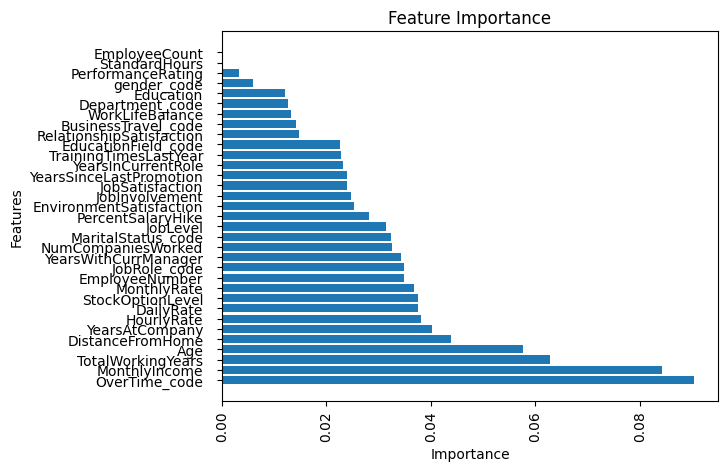

In [222]:
features = x.columns
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]
fig, ax = plt.subplots()
ax.barh(sorted_features, sorted_importances)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.tick_params(axis='y', which='major', pad=10)
plt.xticks(rotation=90)
plt.show()

In [223]:
from sklearn.metrics import confusion_matrix

In [224]:
confusion_matrix(y_test, y_pred)

array([[253,   2],
       [ 35,   4]], dtype=int64)

In [225]:
from sklearn.model_selection import cross_val_score

In [226]:
cross_val_score(model, x_train, y_train, cv = 20)

array([0.81355932, 0.84745763, 0.84745763, 0.84745763, 0.84745763,
       0.84745763, 0.86440678, 0.88135593, 0.84745763, 0.83050847,
       0.81355932, 0.84745763, 0.86440678, 0.88135593, 0.81355932,
       0.86440678, 0.87931034, 0.86206897, 0.84482759, 0.86206897])

In [228]:
from sklearn.metrics import classification_report

In [229]:
class_rep = classification_report(y_pred, y_test)

In [230]:
class_rep

'              precision    recall  f1-score   support\n\n           0       0.99      0.88      0.93       288\n           1       0.10      0.67      0.18         6\n\n    accuracy                           0.87       294\n   macro avg       0.55      0.77      0.55       294\nweighted avg       0.97      0.87      0.92       294\n'

In [231]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       288
           1       0.10      0.67      0.18         6

    accuracy                           0.87       294
   macro avg       0.55      0.77      0.55       294
weighted avg       0.97      0.87      0.92       294

